In [1]:
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *

In [2]:
Nbig = int(2**18)
#Nbig = 10
err = 1e-3

beta = 50
mu = 0
g = 0.1
J = 0.
phase = np.pi/2
lamb = 0. * np.exp(1.0j * phase)
alpha = 1.0
r = 1.
kappa = 1 


omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

In [3]:
GDtau = Time2FreqF(GconfImag(omega,g,beta),Nbig,beta)
GODtau = 0.5*np.ones(Nbig)
DDtau = Time2FreqB(DconfImag(omega,g,beta),Nbig,beta)
DODtau = 0.5*np.ones(Nbig)
omegar2 = ret_omegar2(g,beta)

itern = 0
diff = 1
x = 0.5
xGD, xGOD, xDD, xDOD = (0.5,0.5,0.5,0.5)
diffGD, diffGOD, diffDD, diffDOD = (1.,1.,1.,1.)

while(diff>err):
    itern+=1
    diffoldGD = diffGD
    diffoldGOD = diffGOD
    diffoldDD = diffDD
    diffoldDOD = diffDOD
    
    oldGDtau = 1.0*GDtau
    oldGODtau = 1.0*GODtau
    oldDDtau = 1.0*DDtau
    oldDODtau = 1.0*DODtau
    
    oldGDomega = Time2FreqF(oldGDtau,Nbig,beta)
    oldGODomega = Time2FreqF(oldGODtau,Nbig,beta)
    oldDDomega = Time2FreqB(oldDDtau,Nbig,beta)
    oldDODomega = Time2FreqB(oldDODtau,Nbig,beta)
    
    SigmaDtau = 1.0*kappa * (g**2) * DDtau * GDtau 
    SigmaODtau = 1.0*kappa * (g**2) * DODtau * GODtau
    PiDtau = 1.0 * g**2 * GDtau * GDtau[::-1]
    PiODtau = 1.0 * g**2 * GODtau * GODtau[::-1]
    
    SigmaDomega = Time2FreqF(SigmaDtau,Nbig,beta)
    SigmaODomega = Time2FreqF(SigmaODtau,Nbig,beta)
    PiDomega =  Time2FreqB(PiDtau,Nbig,beta)
    PiODomega = Time2FreqB(PiODtau,Nbig,beta)
    
    # if itern < 15 : 
    #     PiDomega[Nbig//2] = 1.0*r - omegar2
    
    detGmat = (1j*omega - mu - SigmaDomega)**2 - (np.abs(lamb)+SigmaODomega)**2
    detDmat = (nu**2 + r - PiDomega)**2 - (J + PiODomega)**2
    
    GDomega = xGD*((1j*omega - mu - SigmaDomega)/detGmat) + (1-xGD)*oldGDomega
    GODomega = xGOD*((np.abs(lamb) + SigmaODomega)/detGmat) + (1-xGOD)*oldGODomega
    DDomega = xDD*((nu**2 + r - PiDomega)/detDmat) + (1-xDD)*oldDDomega
    DODomega = xDOD*((J + PiODomega)/detDmat) + (1-xDOD)*oldDODomega
    
    if itern < 15 : 
        DDomega[Nbig//2] = 1./(1.0*r - omegar2)
    
    GDtau = Freq2TimeF(GDomega,Nbig,beta)
    GODtau = Freq2TimeF(GODomega,Nbig,beta)
    DDtau = Freq2TimeB(DDomega,Nbig,beta)
    DODtau = Freq2TimeB(DODomega,Nbig,beta)
    
    #diff = (1.0/Nbig) * np. sqrt(np.sum((np.abs(GDtau-oldGDtau))**2 + (np.abs(GODtau-oldGODtau))**2 + 
    #                                  (np.abs(DDtau-oldDDtau))**2 + (np.abs(DODtau-oldDODtau))**2))
    diffGD = np. sqrt((1.0/Nbig) * np.sum((np.abs(GDtau-oldGDtau))**2))
    diffGOD = np. sqrt((1.0/Nbig) * np.sum((np.abs(GODtau-oldGODtau))**2))
    diffDD = np. sqrt((1.0/Nbig) * np.sum((np.abs(DDtau-oldDDtau))**2))
    diffDOD = np. sqrt((1.0/Nbig) * np.sum((np.abs(DODtau-oldDODtau))**2))
    diff = np.max([diffGD, diffGOD, diffDD, diffDOD])
    
    if diffGD>diffoldGD:
        xGD/=2.
    if diffGOD>diffoldGOD:
        xGOD/=2.
    if diffDD>diffoldDD:
        xDD/=2.
    if diffDOD>diffoldDOD:
        xDOD/=2.
    print("itern = ",itern, " , diff = ", diffGD, diffGOD, diffDD, diffDOD , end = '\r')



    

    

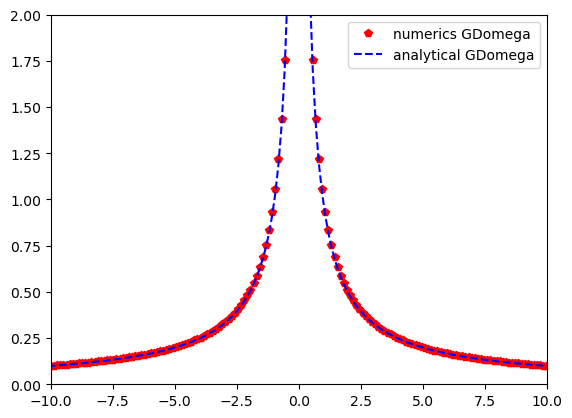

In [4]:
GDconfomega = GconfImag(omega,g,beta)
plt.plot(omega, np.abs(GDomega), 'rp', label = 'numerics GDomega')
plt.plot(omega, np.abs(GDconfomega), 'b--', label = 'analytical GDomega' )
plt.ylim(0,2)
plt.xlim(-10,10)
plt.legend()

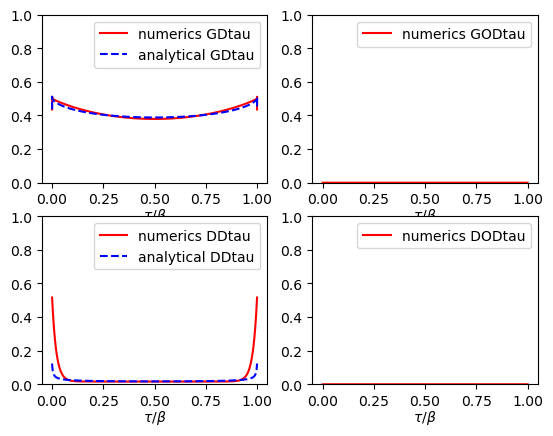

In [5]:
GDconftau = Freq2TimeF(GconfImag(omega,g,beta),Nbig,beta)
DDconftau = Freq2TimeB(DconfImag(nu,g,beta),Nbig,beta)

fig, ax = plt.subplots(2,2)

ax[0,0].plot(tau/beta, np.abs(GDtau), 'r', label = 'numerics GDtau')
ax[0,0].plot(tau/beta, np.abs(GDconftau), 'b--', label = 'analytical GDtau' )
ax[0,0].set_ylim(0,1)
ax[0,0].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[0,0].legend()

ax[0,1].plot(tau/beta, np.abs(GODtau), 'r', label = 'numerics GODtau')
ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[0,1].legend()

ax[1,0].plot(tau/beta, np.abs(DDtau), 'r', label = 'numerics DDtau')
ax[1,0].plot(tau/beta, np.abs(DDconftau), 'b--', label = 'analytical DDtau' )
ax[1,0].set_ylim(0,1)
ax[1,0].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[1,0].legend()

ax[1,1].plot(tau/beta, np.abs(DODtau), 'r', label = 'numerics DODtau')
ax[1,1].set_ylim(0,1)
ax[1,1].set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax[1,1].legend()



In [6]:
ival = 5
tau[ival] , tau[::-1][ival], beta - tau[ival], np.any(tau[::-1][ival] -(beta - tau[ival]))

(0.001049041748046875, 49.99895095825195, 49.99895095825195, False)

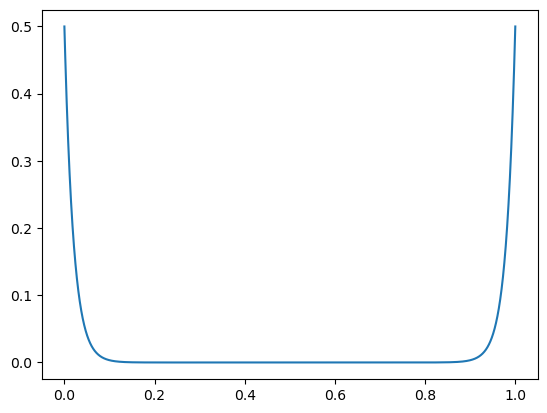

In [7]:
Dfreetau = Freq2TimeB(1/(nu**2 + 1),Nbig,beta)
plt.plot(tau/beta , np.abs(Dfreetau))

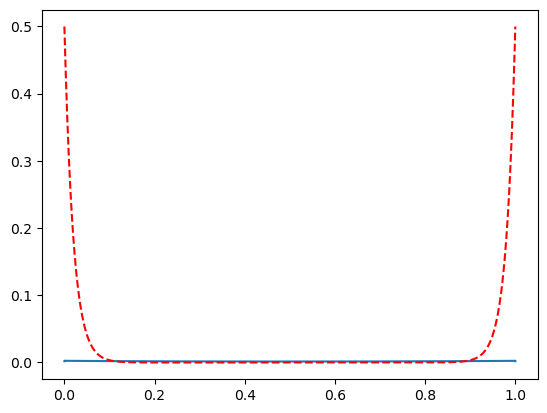

In [8]:
plt.plot(tau/beta,np.real(PiDtau))
plt.plot(tau/beta,DfreeImagtau(tau,r,beta),'r--')
